# Read & Clear Data

In [316]:
import os.path
import numpy as np
import pandas as pd
import feather 
import matplotlib.pyplot as plt  
from time import time
from mailerWithUtf8 import mail

from sklearn.model_selection import train_test_split  
from sklearn import tree  
from sklearn.externals import joblib
from sklearn.datasets import load_breast_cancer 
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import os

In [589]:
def save_dataframe(df, out_filename):
   # write to csv and no index
    t0 = time()
    df.to_csv(out_filename + ".csv", index=False, encoding='utf-8')
#     df.to_csv(out_filename + ".csv", encoding='utf-8')
    print("time for output csv file: %.2f" % (time()-t0))

In [590]:
start_time = time()
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
# filename = '0713_april_marketing_anylze_full_table_group12_max_min_train.feather' 
filename = '0713_april_marketing_anylze_full_table_group12_select_max_min_train.feather' 

train_df = feather.read_dataframe(path + filename)
# df = pd.read_csv(path + filename, error_bad_lines=False, nrows = 10)

print('load feather %s seconds', format(time() - start_time))


load feather %s seconds 0.48629331588745117


In [591]:
# filename = '0713_april_marketing_anylze_full_table_group12_max_min_test.feather' 
filename = '0713_april_marketing_anylze_full_table_group12_select_max_min_test.feather' 
# filename = '0713_april_marketing_anylze_full_table_group12_max_min.feather' 

test_df = feather.read_dataframe(path + filename)
print('load feather %s seconds', format(time() - start_time))

load feather %s seconds 0.6230254173278809


In [592]:
CLASSIFIER = "DECISION"

In [593]:
CURRENT_MODE = "SELECT_MODE"

In [594]:
groups = train_df["Groups"].unique()

In [595]:
groups_idx = 10

In [596]:
target_groups = groups[groups_idx]

In [597]:
out_path = "clf_model/" + target_groups + "/" 

In [598]:
out_filename = CLASSIFIER + "_" + CURRENT_MODE + '_'

# for each group build tree

In [599]:
map_target_groups = []
for group in groups:
    if(group == target_groups):
        map_target_groups.append(group)
    else:
        map_target_groups.append("None")
d = dict(zip(groups, map_target_groups))
train_df["Groups"] = train_df["Groups"].map(d)
test_df["Groups"] = test_df["Groups"].map(d)

In [600]:
train_df.groupby("Groups").count()

,SRV_TYPE_DESC,GENDER_CODE,AGE,TENURE_SCV,BILL_CITY_NAME,DORMANT_MONTH_CNT_MKT,IMEI_MFG_NAME,IMEI_BAND,CHURN_CLM_IND,PTY_NP_IN_IND,...,MOST_MT_DUR,CUST_TYPE,FLAT_RATE_4G_IND,FLAT_RATE_3G_IND,VOICE_MONTHLY_FEE,DATA_MONTHLY_FEE,TOTAL_MONTHLY_FEE,DATA_RATING_USAGE_MB,HS_CHG_CNT,AVG_HS_USE_MONTH
Groups,,,,,,,,,,,,,,,,,,,,,
News,45705,45705,45705,45705,45705,45705,45705,45705,45705,45705,...,45705,45705,45705,45705,45705,45705,45705,45705,45705,45705
None,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,...,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571


In [601]:
# test_class_count = test_df.groupby("Groups").count()[test_df.columns[0:1]].values.flatten()

In [602]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [603]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

# convert y to numeric

In [604]:
le = preprocessing.LabelEncoder()
le.fit(train_df["Groups"].unique())
train_numeric_y = le.transform(train_y)
test_numeric_y = le.transform(test_y) 

In [605]:
# train_x = train_x.reshape(train_x.shape[0], -1)   # normalize

In [606]:
# test_x = test_x.reshape(test_x.shape[0], -1)   # normalize

In [607]:
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(train_y)
# encoded_Y = encoder.transform(train_y)
# # convert integers to dummy variables (i.e. one hot encoded)
# train_y = np_utils.to_categorical(encoded_Y)


In [608]:
# encoded_Y = encoder.transform(test_y)
# # convert integers to dummy variables (i.e. one hot encoded)
# test_y = np_utils.to_categorical(encoded_Y)

In [609]:
# get y unique name
# encoder.classes_

# build Classifier

In [610]:
clf = tree.DecisionTreeClassifier(random_state=0,
                              max_features = "sqrt",
                             )  


In [611]:
start_time = time()
clf.fit(train_x, train_numeric_y)  




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [612]:
if not os.path.exists(out_path):
    os.makedirs(out_path)

In [613]:
joblib.dump(clf, out_path + out_filename + 'CLF.pkl') 
# clf = joblib.load('filename.pkl') 


['clf_model/News/DECISION_SELECT_MODE_CLF.pkl']

In [614]:
clf_info = str(("Accuracy on training set: %f" % clf.score(train_x, train_numeric_y))) + '\n'
clf_info += str(("Accuracy on test set: %f" % clf.score(test_x, test_numeric_y))) + '\n'
clf_info += str(('fit time %s seconds' % format(time() - start_time))) + '\n'
print(clf_info)

Accuracy on training set: 1.000000
Accuracy on test set: 0.935561
fit time 18.22360372543335 seconds



In [615]:
clf.predict(test_x)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [616]:
test_numeric_y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

# get feature importances

In [617]:
important_dict = dict(zip(train_df.columns[:-1], clf.feature_importances_))

In [618]:
important_list = sorted(important_dict.items(), key=lambda x: x[1])

In [619]:
important_list.reverse()

In [620]:
clf_info += '\n\nFeature Importances\n===================\n'
for row in important_list:
    clf_info += str(row) + "\n"
    print(str(row))

('DATA_RATING_USAGE_MB', 0.034675138624943633)
('TENURE_SCV', 0.031537563728368773)
('AGE', 0.027963329861502684)
('MOST_MT_DUR', 0.024841486868821504)
('MO_TTL_DURATION', 0.0247685654143299)
('MOST_MO_DUR', 0.024746318147141254)
('L3M_AVG_NET_INV_AMT', 0.023620442954530599)
('L2M_NET_INV_AMT', 0.023575939866926375)
('MT_STM_AMT', 0.023121640930431189)
('L3M_NET_INV_AMT', 0.0231174598752357)
('MT_TTL_DURATION', 0.023017315739108288)
('MT_OFFNET_DUR', 0.022887317997769871)
('PROM_CURR_EXP_MONTH_CNT', 0.022454082376143669)
('L1M_NET_INV_AMT', 0.022206356160931886)
('NET_INV_AMT', 0.021987099775637991)
('MT_ONNET_DUR', 0.021449844942058923)
('MTC_CHM_DUR', 0.021292731832429777)
('MO_OFFNET_DUR', 0.021139392478416209)
('MT_TTL_COUNT', 0.020206807932365612)
('MTC_FET_DUR', 0.020167942271071933)
('AVG_HS_USE_MONTH', 0.020012733030645151)
('MO_TTL_COUNT', 0.019932475750257365)
('MOC_CHM_DUR', 0.019742838609746023)
('MOC_FET_DUR', 0.019553179158314116)
('MO_ONNET_DUR', 0.018911437361134403)
('

In [621]:
feature_df = pd.DataFrame(important_list, columns = ["COLUMN", "IMPORTANT_VALUE"])

In [622]:
t0 = time()
feature_df.to_csv(out_path + out_filename + "feature_important.csv", index=False)
print("time for output csv file: %.2f" % (time()-t0))

time for output csv file: 0.00


In [623]:
clf.n_classes_

2

In [624]:
clf.n_outputs_

1

In [625]:
md_info = clf_info.replace("\n", "<br>")
with open(out_path + out_filename + 'readme.md', 'w+') as f:
     f.write(md_info)
f.closed

True

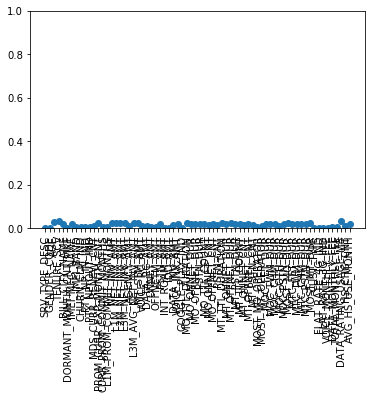

In [626]:
plt.plot(clf.feature_importances_, 'o')  
# for i in 
plt.xticks(range(train_x.shape[1]), train_df.columns[:-1], rotation=90)  
plt.ylim(0, 1)  
plt.show()  

In [393]:
test=mail()
test.main("decision tree finished", "spend time = " + str(time() - start_time))

Start Send Mail
User Email : a - DONE 
User Email : a - DONE 
User Email : 2 - DONE 
User Email : 6 - DONE 
User Email : 3 - DONE 
User Email : 6 - DONE 
User Email : 5 - DONE 
User Email : 5 - DONE 
User Email : 6 - DONE 
User Email : 6 - DONE 
User Email : @ - DONE 
User Email : g - DONE 
User Email : m - DONE 
User Email : a - DONE 
User Email : i - DONE 
User Email : l - DONE 
User Email : . - DONE 
User Email : c - DONE 
User Email : o - DONE 
User Email : m - DONE 
Finish Send Mail


In [9]:
wants_cols = ['SRV_TYPE_DESC',
 'GENDER_CODE',
 'AGE',
 'TENURE_SCV',
 'BILL_CITY_NAME',
 'DORMANT_MONTH_CNT_MKT',
 'IMEI_MFG_NAME',
 'IMEI_BAND',
 'CHURN_CLM_IND',
 'PTY_NP_IN_IND',
 'PTY_NP_OUT_IND',
 'MDS_CURR_RENEW_CNT',
 'PROM_CURR_EXP_MONTH_CNT',
 'CURR_PROM_COMMIT_MONTHS',
 'L1M_PROM_COMMIT_MONTHS',
 'NET_INV_AMT',
 'L1M_NET_INV_AMT',
 'L2M_NET_INV_AMT',
 'L3M_NET_INV_AMT',
 'AGENCY_AMT',
 'L3M_AVG_NET_INV_AMT',
 'MT_STM_AMT',
 'VOICE_RC_AMT',
 'DATA_RC_AMT',
 'ONNET_AMT',
 'OFFNETM_AMT',
 'PSTN_AMT',
 'INT_ROAM_AMT',
 'IDD_AMT',
 'DATA_INV_AMT',
 'VOICE_INV_AMT',
 'GOOGLE_PLAY_IND',
 'MO_TTL_DURATION',
 'MO_ONNET_DUR',
 'MO_OFFNET_DUR',
 'PSTN_DUR',
 'MO_TTL_COUNT',
 'MO_ONNET_CNT',
 'MO_OFFNET_CNT',
 'PSTN_CNT',
 'MT_TTL_DURATION',
 'MT_ONNET_DUR',
 'MT_OFFNET_DUR',
 'MT_PSTN_DUR',
 'MT_TTL_COUNT',
 'MT_ONNET_CNT',
 'MT_OFFNET_CNT',
 'MT_PSTN_CNT',
 'MOST_MO_OPERATOR',
 'MOST_MT_OPERATOR',
 'MOC_FET_DUR',
 'MOC_TWM_DUR',
 'MOC_CHM_DUR',
 'MOC_OTH_DUR',
 'MOC_PSTN_DUR',
 'MOST_MO_DUR',
 'MTC_FET_DUR',
 'MTC_TWM_DUR',
 'MTC_CHM_DUR',
 'MTC_PSTN_DUR',
 'MOST_MT_DUR',
 'CUST_TYPE',
 'FLAT_RATE_4G_IND',
 'FLAT_RATE_3G_IND',
 'VOICE_MONTHLY_FEE',
 'DATA_MONTHLY_FEE',
 'TOTAL_MONTHLY_FEE',
 'DATA_RATING_USAGE_MB',
 'HS_CHG_CNT',
 'AVG_HS_USE_MONTH',
 'Groups']


In [12]:
df.head()

,SRV_TYPE_DESC,GENDER_CODE,AGE,TENURE_SCV,BILL_CITY_NAME,DORMANT_MONTH_CNT_MKT,IMEI_MFG_NAME,IMEI_BAND,CHURN_CLM_IND,PTY_NP_IN_IND,...,CUST_TYPE,FLAT_RATE_4G_IND,FLAT_RATE_3G_IND,VOICE_MONTHLY_FEE,DATA_MONTHLY_FEE,TOTAL_MONTHLY_FEE,DATA_RATING_USAGE_MB,HS_CHG_CNT,AVG_HS_USE_MONTH,Groups
0,0.0,0.0,0.000000,0.076014,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.444239,0.441621,0.005087,0.000000,0.000000,InstantMessage-Low
1,0.0,0.0,0.005495,0.941723,0.045455,0.0,0.001170,0.0,0.5,0.0,...,0.0,0.0,0.0,0.000000,0.221934,0.220626,0.000184,0.066667,0.005988,Infrequent_User
2,0.0,0.5,0.010989,0.016892,0.090909,0.0,0.002339,0.0,0.5,1.0,...,0.0,0.0,0.0,0.000000,0.518340,0.515285,0.007588,0.133333,0.011976,No_ignificant_preference
3,1.0,0.0,0.016484,0.089105,0.136364,0.0,0.003509,0.0,0.5,1.0,...,0.0,1.0,1.0,0.225496,0.285291,0.430203,0.008652,0.000000,0.017964,No_ignificant_preference
4,0.0,0.5,0.016484,0.058699,0.045455,0.0,0.000000,0.0,0.5,1.0,...,0.0,0.0,0.0,0.000000,0.296036,0.294291,0.003747,0.133333,0.011976,InstantMessage-Low


In [13]:
len(df)

1884095

In [14]:
df = df[df["Groups"] != "None"]

In [15]:
len(df)

1884095

In [16]:
# verify deletion
df.groupby('Groups').count()

,SRV_TYPE_DESC,GENDER_CODE,AGE,TENURE_SCV,BILL_CITY_NAME,DORMANT_MONTH_CNT_MKT,IMEI_MFG_NAME,IMEI_BAND,CHURN_CLM_IND,PTY_NP_IN_IND,...,MOST_MT_DUR,CUST_TYPE,FLAT_RATE_4G_IND,FLAT_RATE_3G_IND,VOICE_MONTHLY_FEE,DATA_MONTHLY_FEE,TOTAL_MONTHLY_FEE,DATA_RATING_USAGE_MB,HS_CHG_CNT,AVG_HS_USE_MONTH
Groups,,,,,,,,,,,,,,,,,,,,,
Adult,54309,54309,54309,54309,54309,54309,54309,54309,54309,54309,...,54309,54309,54309,54309,54309,54309,54309,54309,54309,54309
Game,87618,87618,87618,87618,87618,87618,87618,87618,87618,87618,...,87618,87618,87618,87618,87618,87618,87618,87618,87618,87618
HomeLife,74949,74949,74949,74949,74949,74949,74949,74949,74949,74949,...,74949,74949,74949,74949,74949,74949,74949,74949,74949,74949
Infrequent_User,145107,145107,145107,145107,145107,145107,145107,145107,145107,145107,...,145107,145107,145107,145107,145107,145107,145107,145107,145107,145107
InstantMessage-High,424699,424699,424699,424699,424699,424699,424699,424699,424699,424699,...,424699,424699,424699,424699,424699,424699,424699,424699,424699,424699
InstantMessage-Low,431903,431903,431903,431903,431903,431903,431903,431903,431903,431903,...,431903,431903,431903,431903,431903,431903,431903,431903,431903,431903
Map,103786,103786,103786,103786,103786,103786,103786,103786,103786,103786,...,103786,103786,103786,103786,103786,103786,103786,103786,103786,103786
News,57174,57174,57174,57174,57174,57174,57174,57174,57174,57174,...,57174,57174,57174,57174,57174,57174,57174,57174,57174,57174
No_ignificant_preference,266966,266966,266966,266966,266966,266966,266966,266966,266966,266966,...,266966,266966,266966,266966,266966,266966,266966,266966,266966,266966


# Split Data

In [17]:
# train, test = train_test_split(df, test_size = 0.4, random_state = 200)
train, test = train_test_split(df, test_size = 0.33, random_state = 200)

In [18]:
# train_x, train_y = train.iloc[:, 0:-1], train.iloc[:, -1]

In [19]:
# test_x, test_y = test.iloc[:, 0:-1], test.iloc[:, -1]

In [20]:
len(train)

1507276

In [21]:
len(test)

376819

In [22]:
train.groupby('Groups').count()

,SRV_TYPE_DESC,GENDER_CODE,AGE,TENURE_SCV,BILL_CITY_NAME,DORMANT_MONTH_CNT_MKT,IMEI_MFG_NAME,IMEI_BAND,CHURN_CLM_IND,PTY_NP_IN_IND,...,MOST_MT_DUR,CUST_TYPE,FLAT_RATE_4G_IND,FLAT_RATE_3G_IND,VOICE_MONTHLY_FEE,DATA_MONTHLY_FEE,TOTAL_MONTHLY_FEE,DATA_RATING_USAGE_MB,HS_CHG_CNT,AVG_HS_USE_MONTH
Groups,,,,,,,,,,,,,,,,,,,,,
Adult,43512,43512,43512,43512,43512,43512,43512,43512,43512,43512,...,43512,43512,43512,43512,43512,43512,43512,43512,43512,43512
Game,70057,70057,70057,70057,70057,70057,70057,70057,70057,70057,...,70057,70057,70057,70057,70057,70057,70057,70057,70057,70057
HomeLife,59981,59981,59981,59981,59981,59981,59981,59981,59981,59981,...,59981,59981,59981,59981,59981,59981,59981,59981,59981,59981
Infrequent_User,116011,116011,116011,116011,116011,116011,116011,116011,116011,116011,...,116011,116011,116011,116011,116011,116011,116011,116011,116011,116011
InstantMessage-High,339830,339830,339830,339830,339830,339830,339830,339830,339830,339830,...,339830,339830,339830,339830,339830,339830,339830,339830,339830,339830
InstantMessage-Low,345491,345491,345491,345491,345491,345491,345491,345491,345491,345491,...,345491,345491,345491,345491,345491,345491,345491,345491,345491,345491
Map,83009,83009,83009,83009,83009,83009,83009,83009,83009,83009,...,83009,83009,83009,83009,83009,83009,83009,83009,83009,83009
News,45705,45705,45705,45705,45705,45705,45705,45705,45705,45705,...,45705,45705,45705,45705,45705,45705,45705,45705,45705,45705
No_ignificant_preference,213444,213444,213444,213444,213444,213444,213444,213444,213444,213444,...,213444,213444,213444,213444,213444,213444,213444,213444,213444,213444


In [23]:
test.groupby('Groups').count()

,SRV_TYPE_DESC,GENDER_CODE,AGE,TENURE_SCV,BILL_CITY_NAME,DORMANT_MONTH_CNT_MKT,IMEI_MFG_NAME,IMEI_BAND,CHURN_CLM_IND,PTY_NP_IN_IND,...,MOST_MT_DUR,CUST_TYPE,FLAT_RATE_4G_IND,FLAT_RATE_3G_IND,VOICE_MONTHLY_FEE,DATA_MONTHLY_FEE,TOTAL_MONTHLY_FEE,DATA_RATING_USAGE_MB,HS_CHG_CNT,AVG_HS_USE_MONTH
Groups,,,,,,,,,,,,,,,,,,,,,
Adult,10797,10797,10797,10797,10797,10797,10797,10797,10797,10797,...,10797,10797,10797,10797,10797,10797,10797,10797,10797,10797
Game,17561,17561,17561,17561,17561,17561,17561,17561,17561,17561,...,17561,17561,17561,17561,17561,17561,17561,17561,17561,17561
HomeLife,14968,14968,14968,14968,14968,14968,14968,14968,14968,14968,...,14968,14968,14968,14968,14968,14968,14968,14968,14968,14968
Infrequent_User,29096,29096,29096,29096,29096,29096,29096,29096,29096,29096,...,29096,29096,29096,29096,29096,29096,29096,29096,29096,29096
InstantMessage-High,84869,84869,84869,84869,84869,84869,84869,84869,84869,84869,...,84869,84869,84869,84869,84869,84869,84869,84869,84869,84869
InstantMessage-Low,86412,86412,86412,86412,86412,86412,86412,86412,86412,86412,...,86412,86412,86412,86412,86412,86412,86412,86412,86412,86412
Map,20777,20777,20777,20777,20777,20777,20777,20777,20777,20777,...,20777,20777,20777,20777,20777,20777,20777,20777,20777,20777
News,11469,11469,11469,11469,11469,11469,11469,11469,11469,11469,...,11469,11469,11469,11469,11469,11469,11469,11469,11469,11469
No_ignificant_preference,53522,53522,53522,53522,53522,53522,53522,53522,53522,53522,...,53522,53522,53522,53522,53522,53522,53522,53522,53522,53522


In [24]:
train.head()

,SRV_TYPE_DESC,GENDER_CODE,AGE,TENURE_SCV,BILL_CITY_NAME,DORMANT_MONTH_CNT_MKT,IMEI_MFG_NAME,IMEI_BAND,CHURN_CLM_IND,PTY_NP_IN_IND,...,CUST_TYPE,FLAT_RATE_4G_IND,FLAT_RATE_3G_IND,VOICE_MONTHLY_FEE,DATA_MONTHLY_FEE,TOTAL_MONTHLY_FEE,DATA_RATING_USAGE_MB,HS_CHG_CNT,AVG_HS_USE_MONTH,Groups
1834895,0.0,0.0,0.637363,0.045186,0.454545,0.0,0.003509,0.000000,0.5,1.0,...,0.0,0.0,0.0,0.0,0.221934,0.220626,0.001610,0.133333,0.011976,Map
1598361,0.0,0.0,0.181319,0.135980,0.681818,0.0,0.003509,0.000000,0.5,0.0,...,0.0,0.0,0.0,0.0,0.296036,0.294291,0.007767,0.200000,0.107784,HomeLife
1816889,0.0,0.5,0.060440,0.729730,0.090909,0.0,0.000000,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.666543,0.662615,0.002039,0.266667,0.041916,InstantMessage-Low
1515765,0.0,0.5,0.291209,0.078970,0.318182,0.0,0.000000,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.370137,0.367956,0.001623,0.000000,0.035928,InstantMessage-Low
1381281,0.0,0.5,0.071429,0.369088,0.045455,0.0,0.003509,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.370137,0.367956,0.002107,0.200000,0.023952,InstantMessage-High


In [52]:
path = "./marketing_analyze/"
# path = "C:/Users/VIPLAB/Downloads/Spark_data/"
save_dataframe(train, path + out_filename + "_train")

time for output csv file: 120.78


In [ ]:
save_dataframe(test, path + out_filename + "_test")

In [ ]:
train_sample = train.sample(frac=0.1)
len(train_sample)
save_dataframe(train_sample, path + out_filename + "_train_sample")

In [ ]:
test_sample = test.sample(frac=0.1)
len(test_sample)
save_dataframe(test_sample, path + out_filename+ "_test_sample")

In [ ]:
print(len(train_sample))
print(len(test_sample))